# Fakultät für Physik

## Physikalisches Praktikum P1 für Studierende der Physik

Praktikumsvorversuch





# Datenverarbeitung am Beispiel des Pendels

Name: Mustermann Vorname: Martin E-Mail: martin.mustermann@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Musterfrau Vorname: Martina E-Mail: martina.musterfrau@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo99

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Roger Wolf

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 31.10.2023

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

## Aufgabe 1: Umgang mit großen Datensätzen

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-1.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-1.md).**

 * Öffnen Sie die Dateien ```data_raw.csv``` und ```data_down_sampled.csv``` per Doppelklick und untersuchen die Spalten und Zeilen. 
 * Geben Sie die Größe der Dateien in MB an. 
 * Stellen Sie die einzelnen Spalten jeweils in einem Diagramm, als Funktion der Zeit $t$ dar.
 
 Verwenden Sie für alle weiteren Untersuchung die Datei ```data_down_sampled.csv```. 

---

## Lösung

---

 * Die *app* phyphox exportiert die Daten in fünf Spalten mit den eindeutigen Bezeichnungen:
 
   - Time (s)
 
   - Linear Acceleration x (m/s^2)

   - Linear Acceleration y (m/s^2)

   - Linear Acceleration z (m/s^2)

   - Absolute acceleration (m/s^2)

 * Die Datei ```data_raw.csv``` hat eine Größe von $2.4\,\mathrm{MB}$ und 32304 Zeilen (ohne Überschriften). 

 * Die Datei ```data_down_sampled.csv``` hat eine Größe von $13\,\mathrm{kB}$ und 171 Zeilen. 

 * Es handelt sich um eine **Reduktion der Datenmenge um einen Faktor von 190**. Die Reduktion über den Faktor 10 hinaus ergibt sich daraus, dass nur ein Zeitfenster von sample 500 bis sample 2200 ($5{-}22\,\mathrm{s}$ nach Beginn der Datennahme) verwendet wurde. 

 * Eine Inspektion der ausgewählten Daten aus der Datei ```data_down_sampled.csv``` ist in **Abbildung 1** gezeigt: 

Reading from file: data_down_sampled.csv
Saving figure as  data_down_sampled.pdf


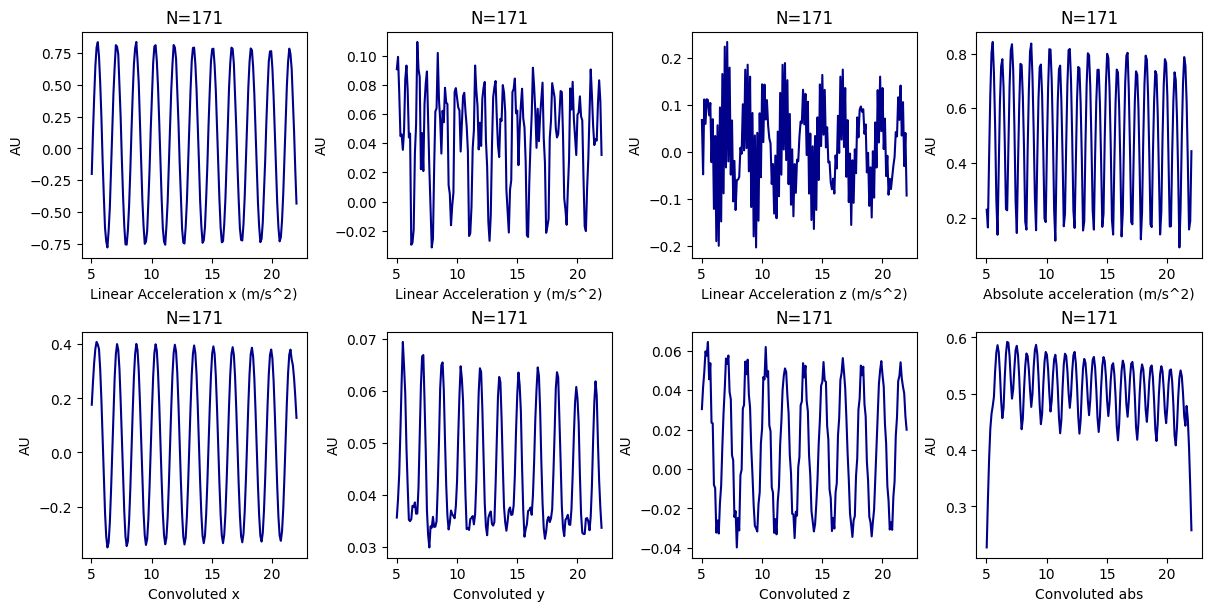

In [1]:
"""
CODE TO CREATE ABBILDUNG 1
"""
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt

def subplot(ax, df, column):
    """
    Create a single subplot per column vs. time from a dataframe.
    """
    ax.plot("Time (s)", column, data=df, color="darkblue")
    ax.set_title("N=%d"%df.shape[0]) # Number of points in plot
    ax.set_xlabel(column)
    ax.set_ylabel("AU")

def plot(df, **kwargs):
    """
    Create a figure for quick inspection of the csv-file.
    
    Creates a 4x2 figure for all columns that are provided by the original csv-
    file. The upper row shows the raw data; for the second row the raw data are 
    smoothed through a running mean with a user-defined window size of 10. The 
    figure is saved in pdf format.
    """
    # Set up the Axes for this example
    fig, ax = plt.subplots(2, 4, figsize=(12., 6.), constrained_layout=True)
    # Columns of the original csv 
    subplot(ax[0][0], df, "Linear Acceleration x (m/s^2)")
    subplot(ax[0][1], df, "Linear Acceleration y (m/s^2)")
    subplot(ax[0][2], df, "Linear Acceleration z (m/s^2)")
    subplot(ax[0][3], df, "Absolute acceleration (m/s^2)")
    # Columns after smoothing
    subplot(ax[1][0], df, "Convoluted x")
    subplot(ax[1][1], df, "Convoluted y")
    subplot(ax[1][2], df, "Convoluted z")
    subplot(ax[1][3], df, "Convoluted abs")
    print("Saving figure as ", kwargs["filename"].replace(".csv", ".pdf"))
    plt.savefig("./"+kwargs["filename"].replace(".csv", ".pdf"))
    plt.show()

def main(**kwargs):
    if not path.isfile(kwargs["filename"]):
        print("Could not find file %s. Please check filename and location"%kwargs["filename"])
        exit() 
    print("Reading from file:", kwargs["filename"])
    # Read csv as pandas dataframe     
    df = pd.read_csv(kwargs["filename"])
    # Apply a running mean smoothing
    df["Convoluted x"] = np.convolve(
        # This is the column name
        df["Linear Acceleration x (m/s^2)"], 
        np.ones(kwargs["w"])/kwargs["w"], 
        mode="same"
        )
    df["Convoluted y"] = np.convolve(
        df["Linear Acceleration y (m/s^2)"], 
        np.ones(kwargs["w"])/kwargs["w"], 
        mode="same"
        )
    df["Convoluted z"] = np.convolve(
        df["Linear Acceleration z (m/s^2)"], 
        np.ones(kwargs["w"])/kwargs["w"], 
        mode="same"
        )
    df["Convoluted abs"] = np.convolve(
        df["Absolute acceleration (m/s^2)"], 
        np.ones(kwargs["w"])/kwargs["w"], 
        mode="same"
        )
    plot(df, **kwargs)

main(
    # File name
    filename="data_down_sampled.csv",
    # Window size for running mean
    w=10
)

**Abbildung 1** (Inspektion der ausgewählten Daten aus der Datei `data_down_sampled.csv`)

---

**Diskussion:**

 * Der (reduzierte) Datensatz umfasst **10 Perioden der Schwingung**. Für uns von Relevanz ist die Beschleunigung in $x$-Richtung, die auch bei weitem die größten Auslenkungen mit dem regelmäßigsten Verhalten aufweist. 

 * Die Beschleunigung in $y$-Richtung zeigt eine Grundschwingung, die mit der Bewegung in $x$-Richtung korreliert ist. Das kann ein Hinweis darauf sein, dass das Smartphone nicht ganz plan auf das Pendel montiert war. Die Oberschwingungen rühren vermutlich eher nicht von einem schrägen Antoß des Pendels sondern von der Beschaffenheit und Auflage des Keils her, der in der Keilpfanne der Aufhängung des Pendelaufbaus liegt. 

 * Ein ähnliches Verhalten beobachten wir für die Bewegung in $z$-Richtung, die zunächst überraschend unregelmäßig und in der Amplitude nicht viel größer als die Bewegung in $y$-Richtung ist. Die Oberschwingungen in dieser Bewegung würden wir ebenfalls auf die Beschaffenheit des Keils und der Keilpfanne zurückführen. 

---

## Aufgabe 2: Mathematische Pendel

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-2.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-2.md).**

Zur Bestimmung von $g$ unterlegen wir zunächst das Modell eines [mathematischen Pendels](https://de.wikipedia.org/wiki/Mathematisches_Pendel), woraus sich $g$ wie folgt ableiten lässt:

$$
g = \frac{4\,\pi^{2}}{T^{2}}\ell,
$$

wobei $\ell$ der Länge des Pendels entspricht. Als Referenzwert für alle weiteren Messungen können Sie den Wert 

$$
g_{\mathrm{exp}} = (9.809599\pm0.000034)\,\mathrm{m/s^{2}}
$$

verwenden. Dieser Wert wurde aus der [Global Gravtiy Database des Bureau Gravimetrique International (BGI)](https://ggos.org/item/bgi/) für die Stadt Mannheim (bei $49,49^{\circ}$ nördlicher Breite und $8,53^{\circ}$ westlicher Länge auf einer Referenzhöhe von $101\,\mathrm{m}$) ausgelesen. 

### Aufgabe 2.1: Referenzmessung von $T$ 

 * Bestimmen Sie **einen einzelnen Wert** für die Periode $T$ in den Daten. 
 * Überlegen Sie sich eine sinnvolle Unsicherheit $\Delta T$ und ermitteln Sie $g$ mit entsprechender Unsicherheit $\Delta g^{(2.1)}$. Bestimmen Sie $\Delta g^{(2.1)}$ mit Hilfe linearer [Fehlerfortpflanzung](https://de.wikipedia.org/wiki/Fehlerfortpflanzung) nach Gauß. Berücksichtigen Sie dabei auch die Unsicherheit $\Delta\ell$.
 * Vergleichen Sie Ihr Ergebnis, im Rahmen der Unsicherheiten, mit $g_{\mathrm{exp}}$.

---

## Lösung

---

 * Als Referenz haben wir die Periode $T$ der Schwingung aus der einzelnen Messung eines Nulldurchgangs der Schwingung in $x$-Richtung bestimmt. Die Nullstellen haben wir mit dem folgenden Skript *per Hand* bestimmt:

In [2]:
"""
CODE TO OBTAIN ONE VALUE FOR THE PERIOD T
"""
import pandas as pd
import numpy as np
from os import path
import yaml

# Proxy for a histogram fit. Values in {*} should be replaced  
HEADSTRING=\
"""\
# Input data:
# input file  : {file}
# raw_data    : {raw_data}
# -----------------------------------------------------------
type: histogram

label: Intercepts
x_label: 'T (sec)'
y_label: 'Density p(T)'

n_bins: 30
bin_range: [{min}, {max}]

model_density_function: |
  def normal_distribution(x, mu={mean}, sigma={std}):
    return np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2.*np.pi*sigma**2)

# Data:
"""

def main(**kwargs): 
    if not path.isfile(kwargs["filename"]):
        print("Could not find file %s. Please check filename and location"%kwargs["filename"])
        exit() 
    print("Reading from file:", kwargs["filename"])
    # Read csv as pandas DataFrame. Rename coumns to x and f for convenience
    # reasons.     
    df = pd.read_csv(kwargs["filename"]).rename(
                  columns={
                      kwargs["x_data"]:"x", 
                      kwargs["y_data"]:"f"
                  }
             ).loc[:, "x":"f"]
    # Find intercept row; a change of sign in f is indicated by "-1" when going
    # from positive to negative and "+1" when going from negative to positive 
    # values in f(x); pd.diff() returns the difference w.r.t. the previous line 
    # and nan in case there is none.
    df["idx"] = ((df["f"]+df["f"].apply(np.abs))/2/df["f"]).diff()
    # Find linearly interpolated intercept in x.
    df["dx"] = df["idx"]*(df["x"]-df["f"]/df["f"].diff()*df["x"].diff())
    # Reduce df to values>0 and get differences between neighboring rows. Also 
    # values<0 could be chosen. The restriction to values of the same sign  
    # among other reasons is made to obtain the period T and not T/2.
    df = pd.DataFrame(df.loc[df["dx"]>0, "dx"].diff())
    # Dump to yaml in a format as expected from the PhyPraKit tool 
    # "run_phyFit.py" for a histogram fit. The name of the output file is 
    # the same as for the input file, only the ending is replaced from 
    # ".csv" to "_intercepts.yaml".
    output_name="./yaml/"+kwargs["filename"].replace(".csv","_intercepts.yaml") 
    print("Saving file:", output_name)
    with open(output_name, "w") as f:
        f.write(
            HEADSTRING.format(
                file   = kwargs["filename"],
                raw_data = kwargs["x_data"],
                min = kwargs["min"], 
                max = kwargs["max"],
                mean= kwargs["mean"], 
                std = kwargs["std"] 
                )
            )
        yaml.dump(
            df.rename(
                columns={
                    # The name required for a histogram fit with the script
                    # "run_phyFit.py"
                    "dx":"raw_data", 
                    }
                ).dropna().to_dict(orient="list"), 
                f
            )   
main(
    # Name of the input file
    filename="data_raw.csv", 
    # Name of the column to dump to yaml as "x_data" (in case)
    x_data="Time (s)", 
    # Name of the column to dump to yaml as "y_data" (in case)
    y_data="Linear Acceleration x (m/s^2)", 
    # Minimum for fitting -- potentially adjust by plotting
    min=1.57,
    # Maximum for fitting -- potentially adjust by plotting
    max=1.63,
    # Mean for fitting -- potentially adjust by plotting
    mean=1.60,
    # Standard deivation for fitting -- potentially adjust by plotting
    std=0.004,
    )

Reading from file: data_raw.csv
Saving file: ./yaml/data_raw_intercepts.yaml


**Diskussion:**

 * Das Skript ließt die Datei ```data_raw.csv``` ein und findet den Nullstellendurchgang dort, wo die Funktion $f$ ($\varphi$ aus der Angabe) ihr Vorzeichen wechselt. An diesen Stellen wird jewels $x$ ausgelesen. 

 * Alle ermittelten Nullstellen werden in eine *yaml*-Datei geschrieben. 

 * Auf diese Art und Weise können wir die Verteilung der Nulldurchgänge darstellen und Erwartungswert und Standardabweichung durch Anpassung einer Gauß-Funktion bestimmen. Wir haben ein bisschen mit den Möglichkeiten das Skript ```run_phyFit.py``` zu konfigurieren herumgespielt und **Abbildung 2** zu unserer Auswertung zugefügt: 

*==* /opt/conda/bin/run_phyFit.py received valid yaml data for fit:
 **  Type of Fit: histogram
type:  histogram
label:  Intercepts
x_label:  T (sec)
y_label:  Density p(T)
n_bins:  30
bin_range:  [1.57, 1.63]
model_density_function:  def normal_distribution(x, mu=1.6, sigma=0.004):
  return np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2.*np.pi*sigma**2)

raw_data:  [0.18696261058181723, 0.10639414857535812, 0.053363951922565156, 0.2906315887751335, 0.30163355025787064, 0.33722706649904644, 0.08738367870884534, 0.2726986578324808, 0.22135853130093164, 0.20322700488908918, 0.15603121810467258, 0.1014620097141985, 0.18510880495225202, 0.10617526965210455, 0.09543041315178602, 0.036787580676103104, 0.5471304539945918, 1.6087833507842504, 1.5901592627532297, 1.5903205535582146, 1.6013088500981336, 1.597084206589651, 1.587573240466929, 1.6022055199940262, 1.5936263342556156, 1.5926460754382177, 1.5994342792404979, 1.5982654810959254, 1.5933581612750949, 1.595139838941357, 1.6012551881187136, 1.58

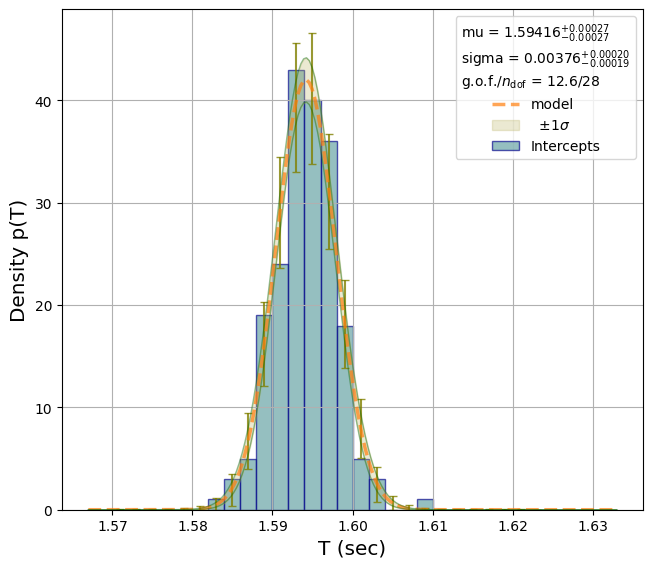

In [14]:
%run /opt/conda/bin/run_phyFit.py ./yaml/data_raw_intercepts.yaml

**Abbildung 2** (Verteilung aller Perioden in der Datei `data_raw.csv`, bestimmt aus den ermittelten Nulldurchgängen, die wir in der Datei `data_raw_intercepts.yaml` gespeichert haben. An die Verteilung wurde eine Normalverteilung angepasst)

---

 * Als einzelne Referenzmessung haben wir uns den Wert aus **Zeile 49 aus der Datei `data_raw_intercepts.yaml`** ausgewählt: 

$$
T = (1.5951\pm0.0178)\,\mathrm{s}.
$$

 * $\Delta T$ haben wir mit $\sqrt{2}\cdot 0.0125\,\mathrm{s}$ abgeschätzt. Das entspricht der Unsicherheit $\Delta x$ auf einen Wert in $x$, aus der Datei ```./params/uncertainties_data.py```, mit einem zusätzlichen Faktor $\sqrt{2}$ versehen, weil wir zwei Werte in $x$ voneinander abziehen (klassische lineare Fehlerfortpflanzung). 
 * Die Werte für $\ell$ und $\Delta \ell$ erhalten wir aus der Datei ```./params/parameters_Aufgabe_2.py```. Wir verwenden $\ell$ als den Abstand des Schwerpunkts des Smartphones vom Aufhängepunkt des Pendels. 

 * Wir bestimmen den Wert $g$ im folgenden Abschnitt:

---

In [4]:
"""
CODE TO CREATE REFERENCE RESULT G_12
"""
import numpy as np
from params.parameters_Aufgabe_2 import l, l_UPPER, l_LOWER
dl=(l_UPPER-l_LOWER)/2

def gmath(T,dT):
    """
    g for the mathematical pendulum in m/s**2. 
    
    T   : Measured value, 
    dT  : Uncertainty in T.
    """
    g = 4*np.pi**2/T/T*l
    # Nothing fancy, linear error propagation assuming 
    # uncorrelated uncertainty sources
    dg= np.sqrt(
            (g/l*dl)**2            # Uncertainty on l
          + (-2*g/T*dT)**2         # Uncertainty on T
        )
    return (g,dg)

print("Reference result (Aufgabe 2.1):\n")
g21 = gmath(1.59583, 0.0178)
print("g21=", g21[0], "+/-", g21[1])
# This is g_exp: 'exp' stands for 'expected' in this context
gexp=9.809599
print("gexp=", gexp)
print("g21/gexp=", g21[0]/gexp)
# This is the cited uncertainty on g_exp; we calculate the 
# statistical pull from it. For this we assume that the 
# uncertainties on g21 and gexp are uncorrelated 
dgexp=0.000034
print("pull=", (g21[0]-gexp)/np.sqrt(g21[1]**2+dgexp**2))

Reference result (Aufgabe 2.1):

g21= 9.74297904571733 +/- 0.21748590871929
gexp= 9.809599
g21/gexp= 0.9932086974928669
pull= -0.30631848224507885


**Zusammenfassung:**

 * Den ermittelten Messwert von $g$ bezeichnen wir im Folgenden mit $g^{(2.1)}$. Ein Vergleich von $g^{(2.1)}$ mit dem gegebenen Referenzwert ist im folgenden zusammengefasst: 
    - $g^{(2.1)} = (9.74\pm0.22)\,\mathrm{m/s^{2}}$
    - $g_{\mathrm{exp}} = (9.809599\pm0.000034)\,\mathrm{m/s^{2}}$
    - $g^{(2.1)}/g_{\mathrm{exp}} = 0.993$
    - $\delta\left(g^{(2.1)},g_{\mathrm{exp}}\right) = -0.31$

   <br>Dabei bezeichnet $\delta\left(g^{(2.1)},g_{\mathrm{exp}}\right)$ den *Pull*
   
$$
\delta\left(g^{(2.1)},g_{\mathrm{exp}}\right)=\frac{g^{(2.1)}-g_{\mathrm{exp}}}{\sqrt{\Delta g^{(2.1)2} + \Delta g_{\mathrm{exp}}^{2}}}
$$

 * Ein relativer Unterschied $<1\%$ beeindruckt. Aussagekräftiger ist jedoch der sogenannte *Pull* $\delta$. Dabei handelt es sich um die Differenz aus Messung und Erwartung geteilt durch die Unsicherheit auf die Differenz, die wir wiederum durch lineare Fehlerfortpflanzung aus den Unsicherheiten der Messung und der Erwartung bestimmt haben. Für eine Erwartung, die mit der Messung kompatibel ist erwarten wir einen *Pull* von $\delta\lesssim1$. **Ein Wert von $\delta=-0.31$ ist sehr zufriedenstellend**. 

 * Zusammenfassend stellen wir eine **gute Übereinstimmung der Messung mit der Erwartung** fest! Wir überlegen allerding, ob wir $\Delta g^{(2.1)}$ nicht noch ein bisschen verbessern können.

---

### Aufgabe 2.2: Erste Verbesserung der Methodik 

 * Bestimmen Sie $T$ aus einer Anpassung an alle Datenpunkte, bestehend aus den Wertepaaren $\left(t,\varphi(t)\right)$. Berücksichtigen Sie dabei die Unsicherheiten sowohl auf $t$, als auch auf $\varphi(t)$. Angaben zu diesen Unsicherheiten können Sie z.B. der Datei [Datenblatt.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/blob/main/Vorversuch/Datenblatt.md) entnehmen. Stellen Sie die Daten und das angepasste Modell geeignet graphisch dar. 
 * Notieren Sie die folgenden wichtigen Ausgaben der Anpassung: 
    * Qualität der Anpassung (quantifiziert durch die Größe $\hat{\chi}^{2}/n_{\mathrm{dof}}$) 
    * Die ermittelten Werte mit entsprechenden Unsicherheiten für alle an die Daten angepassten Parameter. 
 * Berechnen Sie aus den bestimmten Werten für $T$ und $\Delta T$ verbesserte Abschätzungen für $g^{(2.2)}$ und $\Delta g^{(2.2)}$. Bestimmen Sie $\Delta g^{(2.2)}$ mit Hilfe linearer [Fehlerfortpflanzung](https://de.wikipedia.org/wiki/Fehlerfortpflanzung) nach Gauß. Berücksichtigen Sie dabei auch die Unsicherheit $\Delta\ell$.
 * Vergleichen Sie Ihr Ergebnis, im Rahmen der Unsicherheiten, mit $g_{\mathrm{exp}}$. 

---

## Lösung

---

 * Für diese Aufgabe verwenden wir die **Anpassung einer harmonischen Schwingung an die 10 Perioden** aus der Datei `data_down_sampled.csv`. Dabei gehen wir wie folgt vor: 

 * Zunächst konvertieren wir die *csv*- in eine *yaml*-Datei: 

In [15]:
%run /opt/conda/bin/csv2yml.py data_down_sampled.csv -s -q

   -> yaml saved in file data_down_sampled.yaml


 * Aus der Datei, die wir erhalten haben, benötigen wir nur die beiden Blöcke (siehe **Aufgabe 1**):

   - '"Time (s)"' -- `x_data`

   - '"Linear Acceleration x (m/s^2)"' -- `y_data`.

 * Wir haben die Blöcke zu den entsprechenden Schlüsselbegriffen `x_data` und `y_data` umbenannt, um sie mit dem Skript `run_phyFit.py` verwenden zu können.  

 * Zuletzt haben wir den folgenden Block *per Hand* zugefügt, um dem Skript Achsenbeschriftungen, Unsicherheiten und das anzupassende Modell bekannt zu machen. Die Unsicherheiten haben wir wieder aus der Datei `parameters/uncertainties_data.py`bezogen:
 
```yaml
# -----------------------------------------------------------------------------
# Input data:
# input file  : data_down_sampled.csv
# x_data      : Time (s)
# y_data      : Linear Acceleration x (m/s^2)
# -----------------------------------------------------------------------------
model_label: "HARMONIC"

model_function: |
  def model(x, x0=0.75, T=1.59, phi0=0.):
      return x0*np.cos(2*np.pi/T*x+phi0)

y_label: "AU"
y_errors: 0.02

x_errors: 0.0125
x_label: "t (s)"
...
``` 

 * Die Datei haben wir als `data_down_sampled_T_HARMONIC.yaml` im Verzeichnis `yaml` hinterlget.

*==* /opt/conda/bin/run_phyFit.py received valid yaml data for fit:
 **  Type of Fit: xy
model_label:  T_HARMONIC
model_function:  def model(x, x0=0.75, T=1.59, phi0=0.):
    return x0*np.cos(2*np.pi/T*x+phi0)

y_label:  AU
y_errors:  0.02
x_errors:  0.0125
x_label:  t (s)
x_data:  [5.024349958, 5.124306958, 5.224263958, 5.324220958, 5.424177958, 5.524134958, 5.624092958, 5.72404975, 5.82400675, 5.92396375, 6.02392075, 6.12387775, 6.22383475, 6.32379175, 6.42374975, 6.52370675, 6.62366375, 6.723620583, 6.823577583, 6.923534583, 7.023491583, 7.123448583, 7.223405583, 7.323363583, 7.423320583, 7.523277583, 7.623234583, 7.723192, 7.823149, 7.923106, 8.023063, 8.12302, 8.222977, 8.322935, 8.422892, 8.522849, 8.622806, 8.722762958, 8.822719958, 8.922676958, 9.022633958, 9.122590958, 9.222547958, 9.322504958, 9.422461958, 9.522419958, 9.622376958, 9.722333708, 9.822290708, 9.922247708, 10.02220471, 10.12216171, 10.22211871, 10.32207571, 10.42203271, 10.52198971, 10.62194671, 10.72190371, 10.

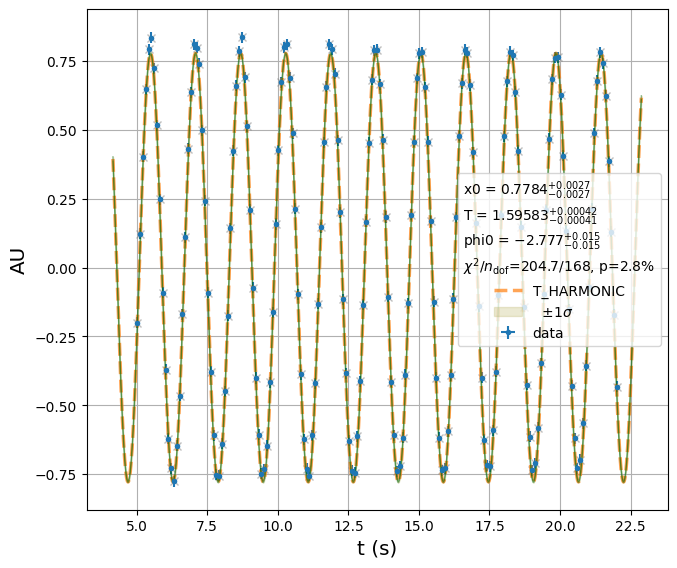

In [16]:
%run /opt/conda/bin/run_phyFit.py ./yaml/data_down_sampled_T_HARMONIC.yaml

**Abbildung 3** (Anpassung des Modells einer harmonischen Schwingung (T_HARMONIC) an die Datenpunkte der Datei `data_down_sampled.yaml`)

---

 * Die angepassten Parameter und ihre Unsicherheiten werden von der Anpassung zurückgegeben. Sie können aber auch aus **Abbildung 3** abgelesen werden. Wir geben sie hier als **wichtige Zwischenergebnisse für Aufgabe 2.2** tabellarisch an: 

| Parameter  | Wert  | Unsicherheit $\Delta$  |
|------------|-------|---------------|
| $x_{0}$    | $0.778$               | $\pm0.0027$  |
| $\phi_{0}$ | $-2.78$                | $\pm0.015$  |
| $T$        | $1.59583\,\mathrm{s}$ | $\pm0.00042\,\mathrm{s}$  |

 * Für die Werte, die wir in Formeln weiterverwenden wollen notieren wir $1{-}2$ signifikante Stellen mehr. Dies ist in unserem Fall für $T$ und $\Delta T$ der Fall. 

 * Für die **Güte der Anpassung** erhalten wir den folgenden Wert:
 
$$
\hat{\chi}^{2}/n_{\mathrm{dof}}=204.7/168.
$$ 

 * Unter Annahme einer $\chi^{2}$-Verteilung mit 168 Freiheitsgraden entspricht dies einem ***p*-Wert von 2.8%**. Der *p*-Wert sagt aus, wie groß die Wahrscheinlichkeit ist, bei einem solchen Experiment, wie diesem einen Ausgang von $\chi^{2}>\hat{\chi}^{2}$ zu erhalten. Um uns den Zusammenhang zwischen $\hat{\chi}^{2}$ und *p*-Wert nochmal klarzu machen, haben wir die Werte, die wir erhalten haben in diesem [*p*-value calculator](http://courses.atlas.illinois.edu/spring2016/STAT/STAT200/pchisq.html) der Universität Illinois nochmal veranschaulicht.   
 
 * Dieser Wert erscheint ernüchternd niedrig. Das könnte ein Hinweis darauf sein kann, dass das zugrundeliegende Modell (T_HARMONIC) die Daten nicht gut beschreibt. Allerdings würde man bei häufiger Wiederholung einer solchen Messung erwarten, in $2.8\%$ aller Ausgänge einen *p*-Wert $\leq 2.8\%$ zu erhalten, *selbst wenn* die Daten, dem Erwartungswert nach, wirklich dem Verlauf des Modells folgen. 

 * Mit Hilfe der Werte für $T$ und $\Delta T$ berechnen wir $g$ neu und bezeichnen diesen Wert im Folgenden als $g^{(2.2)}$:

---

In [7]:
"""
CODE TO CREATE REFERENCE RESULT G_22
"""
print("Improved result (Aufgabe 2.2):\n")
g22 = gmath(1.5958, 0.00042)
print("g22=", g22[0], "+/-", g22[1])
print("gexp=", gexp)
print("g22/gexp=", g22[0]/gexp)
print("pull=", (g22[0]-gexp)/np.sqrt(g22[1]**2+dgexp**2))

Improved result (Aufgabe 2.2):

g22= 9.743345372473561 +/- 0.009294403411898921
gexp= 9.809599
g22/gexp= 0.9932460411963384
pull= -7.12828799204104


**Zusammenfassung:**

 * Der Vergleich von $g^{(2.2)}$ mit unserer Erwartung ist im folgenden zusammengefasst:  

   - $g^{(2.2)} = (9.743\pm0.0093)\,\mathrm{m/s^{2}}$

   - $g^{(2.2)}/g_{\mathrm{exp}} = 0.993$

   - $\delta\left(g^{(2.2)},g_{\mathrm{exp}}\right) = -7.1$

 * Wie zuvor weicht diese Messung nur um $0.7\%$ von der Erwartung ab. **Ein *Pull* von $\delta\left(g^{(2.2)},g_{\mathrm{exp}}\right)=-7.1$ kann aber nicht ignoriert** werden! Wir müssen zusammenfassend feststellen, dass diese Abweichung im Rahmen der angegebenen Unsicherheiten nur sehr schwer durch eine statistische Fluktuation zu erklären ist, d.h. sie ist signifikant. 

 * Das zugrundeliegende Modell ist vermutlich zu einfach, um die Realität vollständig abbilden zu können. Dies ist eine Unzulänglichkeit und damit ein (vermeidbarer) **Fehler** der bisherigen Auswertung. Dieser Fehler wurde bei der Referenzmessung aus **Aufgabe 2.1** durch den großen Wert von $\Delta T$ überdeckt. Durch die deutlich präzisere Bestimmung von $T$ tritt er jetzt offen zutage.

---

### Aufgabe 2.3: Zweite Verbesserung der Methodik

 * Bestimmen Sie $g^{(2.3)}$ und $\Delta g^{2.3}$ direkt aus der Anpassung. Formulieren Sie ihre Modellfunktion dazu entsprechend um, führen Sie die Anpassung erneut durch und vergleichen Sie die Ergebnisse für $g^{(2.3)}$ und $\Delta g^{(2.3)}$ mit den Ergebnissen aus **Aufgabe 2.2**. 
 * Überlegen Sie, wie Sie in diesem Fall $\Delta\ell$ im Ergebnis von $\Delta g^{(2.3)}$ berücksichtigen können.

---

## Lösung

---

 * Um $g$ **direkt aus der Anpassung an die Daten bestimmen** zu können haben wir das Modell T_HARMONIC wie folgt modifiziert und in G_HARMONIC umbenannt:

```yaml
# -----------------------------------------------------------------------------
# Input data:
# input file  : data_down_sampled.csv
# x_data      : Time (s)
# y_data      : Linear Acceleration x (m/s^2)
# -----------------------------------------------------------------------------
model_label: "G_HARMONIC"

model_function: |
  def model(x, x0=0.75, g=9.8, phi0=0):
      return x0*np.cos(np.sqrt(g/0.6285)*x+phi0)
y_label: "AU"
y_errors: 0.02

x_errors: 0.0125
x_label: "t (s)"
...
```

 * Bei dem fest ins Modell kodierten Zahlenwert (0.6285) handelt es sich um den angegebenen Wert von $\ell$ aus der Datei: ```params/parameters_Aufgabe_2.py```. 
 
 * Wir haben dieses Modell in der Datei `data_down_sampled_G_HARMONIC.yaml` im Verzeichnis `yaml` hinterleget und die Anpassung an die Daten erneut durchgeführt:

*==* /opt/conda/bin/run_phyFit.py received valid yaml data for fit:
 **  Type of Fit: xy
model_label:  G_HARMONIC
model_function:  def model(x, x0=0.75, g=9.8, phi0=0):
    return x0*np.cos(np.sqrt(g/0.6285)*x+phi0)

y_label:  AU
y_errors:  0.02
x_errors:  0.0125
x_label:  t (s)
x_data:  [5.024349958, 5.124306958, 5.224263958, 5.324220958, 5.424177958, 5.524134958, 5.624092958, 5.72404975, 5.82400675, 5.92396375, 6.02392075, 6.12387775, 6.22383475, 6.32379175, 6.42374975, 6.52370675, 6.62366375, 6.723620583, 6.823577583, 6.923534583, 7.023491583, 7.123448583, 7.223405583, 7.323363583, 7.423320583, 7.523277583, 7.623234583, 7.723192, 7.823149, 7.923106, 8.023063, 8.12302, 8.222977, 8.322935, 8.422892, 8.522849, 8.622806, 8.722762958, 8.822719958, 8.922676958, 9.022633958, 9.122590958, 9.222547958, 9.322504958, 9.422461958, 9.522419958, 9.622376958, 9.722333708, 9.822290708, 9.922247708, 10.02220471, 10.12216171, 10.22211871, 10.32207571, 10.42203271, 10.52198971, 10.62194671, 10.7219037

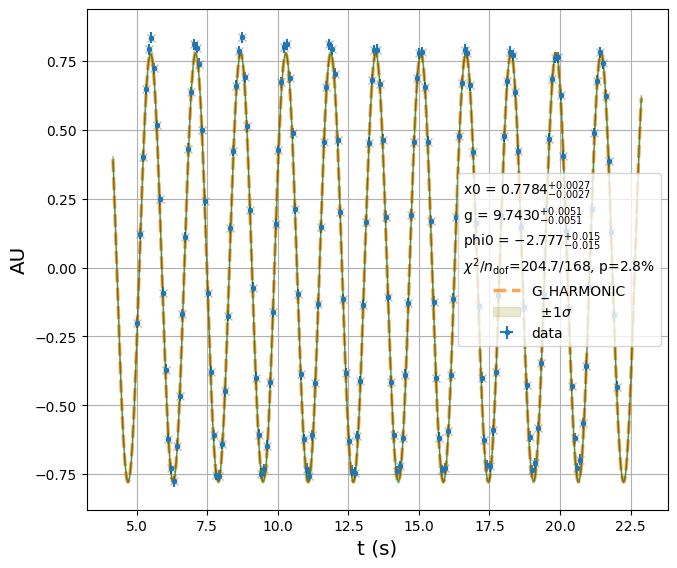

In [17]:
%run /opt/conda/bin/run_phyFit.py ./yaml/data_down_sampled_G_HARMONIC.yaml

**Abbildung 4** (Anpassung des Modells G_HARMONIC, aus dem wir $g$ direkt ablesen können, an die Datenpunkte der Datei `data_down_sampled.yaml`)

---

 * Der aus der Anpassung ermittelte Wert von $g$, den wir im Weiteren mit $g^{(2.3)}$ bezeichnen werden, beträgt

$$
g^{(2.3)} = 9.743\,\mathrm{m/s^{2}}
$$

 * Wir stellen fest, dass der bestimmte Zentralwert von $g^{(2.3)}$ **mit den Ergebnis von Aufgabe 2.2 identisch** ist. Dies entspricht genau unserer Erwartung, da es sich bei dem oben verwendeten Modell nur um eine **Umparametrisierung des Modells von Aufgabe 2.2** handelt. 

 * Interessanter ist die Beobachtung, dass die Unsicherheit (die wir weiterhin mit $\Delta g^{(2.3)}_{\mathrm{stat.}}$ bezeichnen werden) deutlich kleiner ausfällt, als dies für **Aufgabe 2.2** der Fall war. 
 
 * Das liegt daran, dass $\Delta g^{(2.3)}_{\mathrm{stat.}}$ nur die Unsicherheiten berücksichtigt, die ganz konkret mit den Messpunkten aus der Datei `data_down_sampled.csv` verbunden sind. 

 * Würden wir eine solche Messung unter ansonsten identischen Bedingungen wiederholen, würden die Datenpunkte einer entsprechenden neuen Datei innerhalb der angegebenen Unsicherheiten fluktuieren. Diese Art von Unsicherheiten bezeichnen wir in der Physik als **statistische Unsicherheiten**. 

 * Die Unsicherheit $\Delta \ell$ auf den Parameter $\ell$, den wir aus der Datei `parameters/parameters_Aufgabe_2.py` ausgelesen haben, findet bisher noch keine Berücksichtigung. Bei $\ell$ handelt es sich um einen **externen Parameter des zugrundeliegenden Modells**. Um $\Delta \ell$ ebenfalls zu berücksichtigen haben wir grundsätzlich zwei Möglichkeiten: 
   * Wir fügen $\Delta\ell$ durch lineare Fehlerfortpflanzung, wie in **Aufgabe 2.2** zu.
   
   * Um uns die Propagation des Effekts von $\Delta \ell$ auf $g^{(2.3)}$ zu ersparen, wiederholen wir die Anpassung ($2\times$) mit variierten Werten von $\ell\pm\Delta\ell$. Daraus erhalten wir einen Wert $\Delta g^{(2.3)}_{\mathrm{syst.}}$ den wir quadratisch zu $\Delta g^{(2.3)}_{\mathrm{stat.}}$ addieren. Wir bezeichnen $\Delta g^{(2.3)}_{\mathrm{syst.}}$ als **systematische Unsicherheit**. In der Physik sind systematische Unsicherheiten grundsätzlich mit systematischen Variationen, wie wir sie hier durchgeführt haben, verbunden.

In [9]:
"""
CODE TO OBTAIN THE UNCERTAINTIES FOR G_23
"""
print("Split by stat. and syst. uncertainty (Aufgabe 2.3):\n")
g23_upper = 9.7507
g23_lower = 9.7352
g23_syst  = abs(g23_upper-g23_lower)/2
print("Delta g23 (stat)=+/- 0.005")
print("Delta g23 (syst)=+/-",g23_syst)
print("Delta g23 (comb)=+/-", np.sqrt(0.005**2+g23_syst**2))

Split by stat. and syst. uncertainty (Aufgabe 2.3):

Delta g23 (stat)=+/- 0.005
Delta g23 (syst)=+/- 0.007749999999999702
Delta g23 (comb)=+/- 0.009222933372848107


 * Nach diesem Vorgehen erhalten wir die folgenden Ergebnisse: 

   * $\Delta g^{(2.3)}_{\mathrm{stat.}} = 0.005\,\mathrm{m/s^{2}}$
   * $\Delta g^{(2.3)}_{\mathrm{syst.}} = 0.008\,\mathrm{m/s^{2}}$
   * $\Delta g^{(2.3)} = 0.009\,\mathrm{m/s^{2}}$
 
   <br>und daraus das Gesamtergebnis: 

$$
g^{(2.3)} = (9.743\pm0.005\,(\mathrm{stat.})\pm0.008\,(\mathrm{syst.}))\,\mathrm{m/s^{2}}
$$

 * Einschließlich(!) der angegebenen Unsicherheiten stimmt dieses Ergebnis genau mit dem Ergebnis aus **Aufgabe 2.2** überein. 

 * Der $\hat{\chi}^{2}/n_{\mathrm{dof}}$-Wert ist ebenfalls unverändert niedrig. Es ist allerdings auch nicht zu erwarten, dass sich dieser Wert ändert, da das Modell, bis auf die Umparametrisierung, ebenfalls unverändert geblieben ist. 

---

## Aufgabe 3: Schrittweise Erweiterung des Modells

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-3.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-3.md).**

Eine offensichtliche Unzulänglichkeit des vorherigen Modells besteht in der Vernachlässigung der endlichen Ausdehnung des Pendels. Wenn Sie das Modell entsprechend erweitern, nimmt die Formel zur Bestimmung von $g$ die folgende Form an: 

$$
g = \frac{4\,\pi^{2}}{T^{2}}\frac{\Theta}{Ms},
$$

wobei $\Theta$ und $M$ dem Trägheitsmoment und der Masse der gesamten Pendelkonstruktion (einschließlich aller Montageteile und Smartphone!) und $s$ dem Abstand zwischen dem Schwerpunkt und der Aufhängung des Pendels entsprechen.

### Aufgabe 3.1: Erste Erweiterung des Modells 

 * Modifizieren Sie Ihr Modell, so dass es dem Modell eines [physikalischen Pendels](https://de.wikipedia.org/wiki/Physikalisches_Pendel) entspricht und machen Sie eine neue Abschätzung für $g^{(3.1)}$ und $\Delta g^{(3.1)}$. 
 * Schätzen Sie den Einfluss von $\Delta\Theta$, $\Delta M$, und $\Delta s$ auf $\Delta g^{(3.1)}$ ab und überlegen Sie, wie Sie diese Unsicherheiten geeignet zu einer Gesamtunsicherheit kombinieren können.

---

## Lösung

---

 * Um die physikalische Ausdehnung des Pendels zu berücksichtigen haben wir das Modell aus **Aufgabe 2.3** wie folgt abgeändert: 

```yaml
# -----------------------------------------------------------------------------
# Input data:
# input file  : data_down_sampled.csv
# x_data      : Time (s)
# y_data      : Linear Acceleration x (m/s^2)
# -----------------------------------------------------------------------------
model_label: "G_HARMONIC_NEW"

model_function: |
  def model(x, x0=0.75, g=9.8, phi0=0):
      return x0*np.cos(np.sqrt(0.789*0.473*g/0.23523)*x+phi0)
y_label: "AU"
y_errors: 0.02

x_errors: 0.0125
x_label: "t (s)"
...
```

 * Bei den fest ins Modell kodierten Zahlenwerten handelt es sich nun um die angegebenen Werte von $\Theta$, $M$, und $s$ aus der Datei: ```params/parameters_Aufgabe_3.py```. 
 
 * Wir haben dieses Modell in der Datei `data_down_sampled_G_HARMONIC_NEW.yaml` im Verzeichnis `yaml` hinterlegt und die Anpassung an die Daten erneut durchgeführt:

*==* /opt/conda/bin/run_phyFit.py received valid yaml data for fit:
 **  Type of Fit: xy
model_label:  G_HARMONIC_NEW
model_function:  def model(x, x0=0.75, g=9.8, phi0=0):
    return x0*np.cos(np.sqrt(0.789*0.473*g/0.23523)*x+phi0)

y_label:  AU
y_errors:  0.02
x_errors:  0.0125
x_label:  t (s)
x_data:  [5.024349958, 5.124306958, 5.224263958, 5.324220958, 5.424177958, 5.524134958, 5.624092958, 5.72404975, 5.82400675, 5.92396375, 6.02392075, 6.12387775, 6.22383475, 6.32379175, 6.42374975, 6.52370675, 6.62366375, 6.723620583, 6.823577583, 6.923534583, 7.023491583, 7.123448583, 7.223405583, 7.323363583, 7.423320583, 7.523277583, 7.623234583, 7.723192, 7.823149, 7.923106, 8.023063, 8.12302, 8.222977, 8.322935, 8.422892, 8.522849, 8.622806, 8.722762958, 8.822719958, 8.922676958, 9.022633958, 9.122590958, 9.222547958, 9.322504958, 9.422461958, 9.522419958, 9.622376958, 9.722333708, 9.822290708, 9.922247708, 10.02220471, 10.12216171, 10.22211871, 10.32207571, 10.42203271, 10.52198971, 10.621

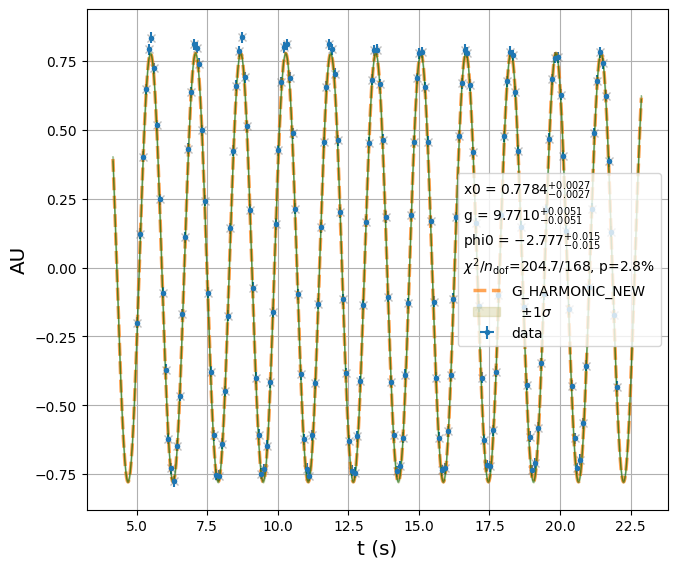

In [18]:
%run /opt/conda/bin/run_phyFit.py ./yaml/data_down_sampled_G_HARMONIC_NEW.yaml

**Abbildung 5** (Anpassung des Modells G_HARMONIC_NEW, in dem die endliche Ausdehnung des Pendels berücksichtigt ist, an die Datenpunkte der Datei `data_down_sampled.yaml`)

---

 * Wir stellen fest, dass sich der aus der Anpassung ermittelte Wert von $g$, den wir weiterhin mit $g^{(3.1)}$ bezeichnen werden, im Vergleich zu **Aufgabe 2** verändert hat. Er beträgt nun <br>
$$
g^{(3.1)} = (9.771\pm0.005\,(\mathrm{stat.}))\,\mathrm{m/s^{2}}
$$
   <br>und ist damit etwas näher an unsere Erwartung gerückt. 
   
 * Die Unsicherheit $\Delta g^{(3.1)}_{\mathrm{stat.}}$ ist mit den Ergebnis von **Aufgabe 2.3** identisch. Dies ist wiederum nicht verwunderlich, denn bis auf einen Skalenfaktor an $g$ ist das Modell nach wie vor unverändert, weshalb wir auch nach wie vor den gleichen niedrigen *p*-Wert für die Anpassung erhalten, wie zuvor. 

 * **Unsere Hoffnung, dass sich durch das realistischere Modell die Beschreibung unserer Daten verbessern würde hat sich daher zerschlagen.**

 * Zur Abschätzung der Unsicherheiten $\Delta\Theta$, $\Delta M$ und $\Delta s$ gehen wir analog zu **Aufgabe 2.3** vor. Dazu haben wir die Anpassung $6\times$ mit variierten Parametern durchgeführt und $g^{(3.1)}$ jeweils neu daraus bestimmt:

In [11]:
"""
CODE TO OBTAIN THE UNCERTAINTIES FOR G_31
"""
print("Split by stat. and syst. uncertainties (Aufgabe 3.1):\n")
# Estimates for Theta
g31_T_upper = 9.8778
g31_T_lower = 9.6701
g31_T_syst  = abs(g31_T_upper-g31_T_lower)/2
# Estimates for M
g31_M_upper = 9.7095
g31_M_lower = 9.8333
g31_M_syst  = abs(g31_M_upper-g31_M_lower)/2
# Estimates for s
g31_s_upper = 9.6285
g31_s_lower = 9.9178
g31_s_syst  = abs(g31_s_upper-g31_s_lower)/2
# Combination
g31_syst = np.sqrt(g31_T_syst**2+g31_M_syst**2+g31_s_syst**2)
g31_comb = np.sqrt(g31_syst**2+0.005**2)
print("Delta g31        (stat)=+/- 0.005")
print("Delta g31(Theta) (syst)=+/-",g31_T_syst)
print("Delta g31(M)     (syst)=+/-",g31_M_syst)
print("Delta g31(s)     (syst)=+/-",g31_s_syst)
print("Delta g31        (syst)=+/-",g31_syst)
print("Delta g31 (comb)=+/-", g31_comb)

Split by stat. and syst. uncertainties (Aufgabe 3.1):

Delta g31        (stat)=+/- 0.005
Delta g31(Theta) (syst)=+/- 0.10385000000000044
Delta g31(M)     (syst)=+/- 0.06189999999999962
Delta g31(s)     (syst)=+/- 0.1446499999999995
Delta g31        (syst)=+/- 0.18852070178099778
Delta g31 (comb)=+/- 0.1885869958401159


 * Wir stellen fest, das $\Delta g^{(31)}_{\mathrm{syst.}}$ (mit einem Wert von $\pm0.19\,(\mathrm{stat.}\,\mathrm{m/s^{2}}$) **unter dem neuen und vermeitlich *besseren* Modell um ein Vielfaches größer geworden** ist als zuvor. Die Messung ist durch die neu eingeführten systematischen Unsicherheiten vollkommen dominiert. 
 
 * Das enttäuscht zunächst: Wir haben ein komplizierteres Modell, das uns bei der Beschreibung der Daten nicht weitergeholfen hat, und zu allem Überfluss ist unsere Messung trotz aller Bemühungen nur um ein Weniges genauer, als die Referenzmessung aus **Aufgabe 2.1**.

 * Tatsächlich hat das neue Modell aber Unsicherheitsquellen offen gelegt, die zuvor nicht offensichtlich waren: 
   * Als dominante Unsicherheitsquellen erweisen sich $\Delta\Theta$ und $\Delta s$. Das ist sofort ersichtlich, wenn man bedenkt, dass beide Größen zum einen großen Einfluss auf die Messgröße $g$ haben und zum anderen schwierig zu bestimmen sind.
   
   * In das einfache Modell aus **Aufgabe 2** konnten diese Unsichereiten garnicht abgebildet werden.

 * Wir fassen an dieser Stelle noch einmal den Vergleich mit unserer Erwartung zusammen: 

In [12]:
"""
CODE TO COMPARE THE RESULT OF G31 WITH OUR EXPECTATION
"""
print("Improved result (Aufgabe 3.1):\n")
g31=9.771
print("g31="+str(g31)+"+/-"+str(g31_syst))
print("gexp=", gexp)
print("g22/gexp=", g31/gexp)
print("pull=", (g31-gexp)/np.sqrt(g31_comb**2+dgexp**2))

Improved result (Aufgabe 3.1):

g31=9.771+/-0.18852070178099778
gexp= 9.809599
g22/gexp= 0.9960651806460183
pull= -0.2046747666812428


**Zusammenfassung:**

 * Der Vergleich von $g^{(3.1)}$ mit unserer Erwartung ist im folgenden zusammengefasst:  

   - $g^{(3.1)} = (9.77\pm0.19)\,\mathrm{m/s^{2}}$

   - $g^{(3.1)}/g_{\mathrm{exp}} = 0.996$

   - $\delta(g^{(3.1)},g_{\mathrm{exp}}) = -0.2$

 * Mit einem *Pull* von -0,20 stellen wir tatsächlich bessere Konsistenz zwischen dem gemessenen Wert und der Erwartung fest, als in den vorherigen Fällen. 
 
 * Dies ist kein Taschenspielertrick, so als hätten wir die systematischen Unsicherheiten nur so lange erhöht, bis wir Übereinstimmung mit der Ewartung erzielt hätten. Tatsächlich sind die mit dieser Messmethode verbundenen systematischen Unsicherheiten so groß, dass sich der Wert von $g$ nicht genauer angeben lässt. Diesen Umstand hat das Modell aus **Aufgabe 2**, aufgrund seiner Einfachheit, nicht abbilden können.
 
---


### Aufgabe 3.2: Zweite Erweiterung des Modells

Das Pendel erfährt in seiner Bewegung zusätzlich eine Dämpfung. Wenn Sie der Messung das Modell einer [linearer gedämpften Schwingung](https://de.wikipedia.org/wiki/Schwingung#Linear_ged%C3%A4mpfte_Schwingung) zugrunde legen verändert sich die Formel zur Bestimmung von $g$ wie folgt: 

$$
g = \left(\frac{4\,\pi^{2}}{T^{2}}+\frac{1}{\tau^{2}}\right)\frac{\Theta}{Ms},
$$

wobei $\tau$ einer Abklingzeit der Schwingungsamplitude in Sekunden entspricht. Wie Sie sehen handelt es sich um eine Korrektur, die die Abschätzung von $g$ zu größeren Werten hin verändert. 

Verändern Sie ihr Modell geeignet und beantworten Sie die folgenden Fragen: 
  * Kann das zugrundeliegende Modell die Daten beschreiben? 
  * Wie könnten Sie die Hypothese, dass das zugrundeliegende Modell die Daten beschreiben kann, noch besser testen? 
  * Wie groß ist der Effekt der Korrektur aus der obigen Gleichung auf die Messung von $g$? 

---

## Lösung

---

 * Im nächsten Schritt erweitern wir das Modell um den Umstand, dass die Schwingung des Pendels gedämpft wird. Wir versuchen es mit einem Modell mit linearer Dämpfung. Ein solches Modell führt zu einer Schwingung der Form:<br><br>
$$
\varphi(t) = \varphi_{0}\,e^{-t/\tau}\cos\left(\sqrt{\frac{M\,s}{\Theta}\,g-\frac{1}{\tau^{2}}}\,t + \phi\right),
$$
<br>wobei $\tau$ ein weiterer zu bestimmender Parameter der Anpassung wird.

 * Wir haben das Modell wie folgt verändert und in der Datei `./yaml/data_down_sampled_G_DAMPED.yaml` hinterlegt:

```yaml
# -----------------------------------------------------------------------------
# Input data:
# input file  : data_down_sampled.csv
# x_data      : Time (s)
# y_data      : Linear Acceleration x (m/s^2)
# -----------------------------------------------------------------------------
model_label: "G_DAMPED"

model_function: |
  def model(x, tau=240., x0=0.75, g=9.8, phi0=0):
      return x0*np.exp(-x/tau)*np.cos(np.sqrt(0.789*0.473*g/0.23523-1./tau**2)*x+phi0)

y_label: "AU"
y_errors: 0.02

x_errors: 0.0125
x_label: "t (s)"
...
```

 * Aus der erneuten Anpassung erhalten wir das folgende Ergebnis der Anpassung: 

*==* /opt/conda/bin/run_phyFit.py received valid yaml data for fit:
 **  Type of Fit: xy
model_label:  G_DAMPED
model_function:  def model(x, tau=240., x0=0.75, g=9.8, phi0=0):
    return x0*np.exp(-x/tau)*np.cos(np.sqrt(0.789*0.473*g/0.23523-1./tau**2)*x+phi0)

y_label:  AU
y_errors:  0.02
x_errors:  0.0125
x_label:  t (s)
x_data:  [5.024349958, 5.124306958, 5.224263958, 5.324220958, 5.424177958, 5.524134958, 5.624092958, 5.72404975, 5.82400675, 5.92396375, 6.02392075, 6.12387775, 6.22383475, 6.32379175, 6.42374975, 6.52370675, 6.62366375, 6.723620583, 6.823577583, 6.923534583, 7.023491583, 7.123448583, 7.223405583, 7.323363583, 7.423320583, 7.523277583, 7.623234583, 7.723192, 7.823149, 7.923106, 8.023063, 8.12302, 8.222977, 8.322935, 8.422892, 8.522849, 8.622806, 8.722762958, 8.822719958, 8.922676958, 9.022633958, 9.122590958, 9.222547958, 9.322504958, 9.422461958, 9.522419958, 9.622376958, 9.722333708, 9.822290708, 9.922247708, 10.02220471, 10.12216171, 10.22211871, 10.32207571, 10.

<string>:4: RuntimeWarning: overflow encountered in exp
<string>:4: RuntimeWarning: invalid value encountered in sqrt


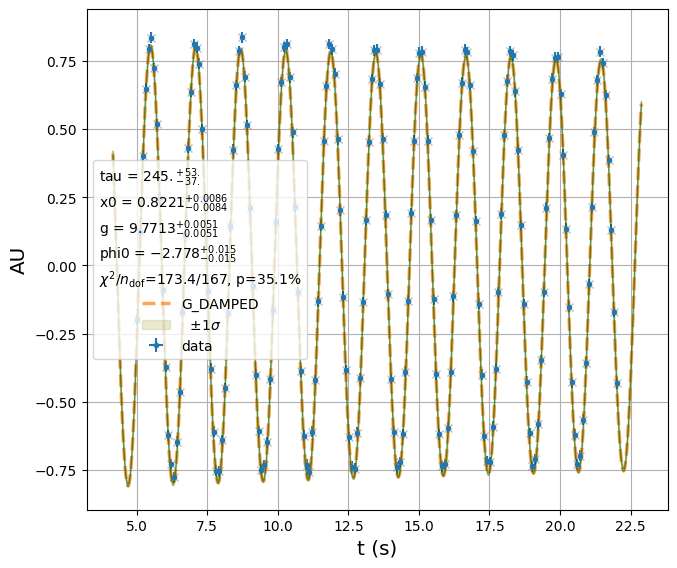

In [19]:
%run /opt/conda/bin/run_phyFit.py yaml/data_down_sampled_G_DAMPED.yaml

**Abbildung 6** (Anpassung des Modells G_DAMPED, unter Berücksichtigung eines linearen Dämpfungsterms der Schwingung, an die Datenpunkte der Datei `data_down_sampled.yaml`)

---

 * Wir stellen mit Befriedigung fest, dass diese Änderung tatsächlich zu einer Verbesserung des $\hat{\chi}^{2}/n_{\mathrm{ndof}}$-Werts führt. **Der entsprechende *p*-Wert steigt von 2,8% auf 35,1%!** Wir haben also den Freiheitsgrad gefunden, der dem Modell fehlte, um die Daten wirklich im Rahmen der angegebenen Unsicherheiten beschreiben zu können. 
 
 * Tatsächlich kann man dem Modell ansehen, dass es die Daten besser beschreibt, als zuvor. Die Beschreibung sah zuvor aber auch nicht unbedingt schlecht auf. Auf das Urteil des Auges sollte man sich in solchen Fällen also nicht unbedingt verlassen. 
 
 * Wir stellen ferner fest, dass bei der Bestimmung des $\hat{\chi}^{2}/n_{\mathrm{ndof}}$-Wertes einen Freiheitsgrad weniger auftaucht, als zuvor (vgl. z.B. **Abbildung 5**). Dies ist dem zusätzlichen Modellparameter $\tau$ geschuldet. 
 
 * Weiterhin stellen wir fest, dass sich der Wert von $g^{(3.2)}$ kaum von $g^{(3.1)}$ unterscheidet. Durch kurze Rechnung überzeugen wir uns von de Größe des Effekts, den $\tau$ auf die Bestimmung von $g^{(3.2)}$ hat:  

In [8]:
from params.parameters_Aufgabe_3 import Theta, M, s

tau=245
print("Delta g32=",Theta/M/s/tau**2, "m/s**2")


Delta g32= 1.050080021729063e-05 m/s**2


 * Wir stellen fest, dass der Effekt für den vorliegenden Wert von $\tau$ tatsächlich nur von der Größenordnung $\mathcal{O}(10^{-5}\,\mathrm{m/s^{2}})$ ist, er spielt also für unsere Betrachtungen keine Rolle. 
 
 * Wir fragen uns noch, warum die Änderung von $g^{(3.2)}$ relativ zu $g^{(3.1)}$ dann doch im Bereich von $\mathcal{O}(10^{-4}\,\mathrm{m/s^{2}})$ liegt (also 10-mal größer ist). Wir vermuten, dass dies der Einfluss der geringen negativen Korrelation zwischen $\tau$ und $g$ ist, die wir aus der Ausgabe der Anpassung ablesen können. Keine Dämpfung ist gleichbedeutend mit $\tau\to\infty$. Da $\tau=245\pm53\,\mathrm{s}<\infty$ hat das einen erhöhenden Einfluss auf $g$.  
 
 * Auf diesem Datensatz haben wir die Bedeutung von $\tau$ für eine gute Beschreibung der Daten nicht sofort erkannt. Auf einem größeren Datensatz über einen längeren Messzeitraum ($\mathcal{O}(5\,\mathrm{min})$), wäre die Notwengikeit für $\tau$ offensichtilich geworden. 
 
 * Eine gute Beschreibung der Daten hat sich für diese Messung als nicht absolut notwendig erwiesen, da $\tau$ eben nur sehr geringen Einfluss auf $g$ hat. Grundsätzlich ist es jedoch immer vorzuziehen eine gute Beschreibung der Daten zu erzielen. 
 
---


## Bonusaufgabe: Vom Messen zur Kunst

Ein bewusst formuliertes Modell zur Behandlung der Unsicherheiten, die in eine Parameterschätzung eingehen, ist Bestandteil eines guten statistischen Modells. Die Diskussion über die Berücksichtigung der Unsicherheiten der Modellparameter $\Theta$, $M$ und $s$, bei der Bestimmung von $g$ und $\Delta g$ in **Aufgabe 3.1** wirft eine Frage auf, die wir im Rahmen dieses Vorversuchs bisher nur streifen konnten: Wie sind die Unsicherheiten auf die äußeren Parameter der Messung korreliert? Sie können die folgenden Bonusaufgaben bearbeiten, um dieser Frage weiter nachzugehen. Die Bearbeitung ist jedoch nicht verpflichtend.

### Bonusaufgabe 1: Korrelierte Unsicherheiten

Jede Variation eines der drei Parameter $\Theta$, $M$ oder $s$ in **Aufgabe 3.1** hat einen nicht-trivialen Einfluss, nicht nur auf $g$, sondern auch auf die jeweils anderen äußeren Parameter. Durch naive, quadratische Addition von $\Delta \Theta$, $\Delta M$, und $\Delta s$ unterlegen Sie (vielleicht unbewusst) die Annahme, das alle drei Variationen paarweise unabhängig sind. Diese Annahme ist auf jeden Fall falsch! Ein anderes Modell, dass Sie anwenden könnten, wäre zwei oder alle Parameter vollständig zu korrelieren. Was bedeutet diese Annahme für die Variation der Parameter? Denken, Sie dass diese Annahme korrekt ist? Machen Sie einen Vorschlag zur Lösung dieses Problems. 

### Bonusaufgabe 2: Experimentelle Verbesserung der Messung 

Diskutieren Sie, wie dieser Versuch konzeptionell verbessert werden könnte, um die in Bonusaufgabe 1 diskutierten Probleme von vornherein zu vermeiden.  

---

 * Wir stellen zunächst fest, dass $\Delta\Theta$, $\Delta M$ und $\Delta s$ wirklich nicht unabhängig voneinander sein können. Wenn z.B. die Position der Halterung für das Smartphone falsch bestimmt wurde hat dies Einfluss auf $\Theta$ und $s$ gleichermaßen. Ebenso, hat es Einfluss auf $\Theta$, $s$ und $M$, wenn die Masse des Smartphones flasch bestimmt wurde. 
 
 * Wir könnten z.B. annehmen, dass die Variationen von $\Delta\Theta$ und $\Delta s$ zu 100% korreliert sind. Das würde bedeuten, dass eine Variation von `g31_T_upper/lower` gleichzeitig mit einer Variation von `g31_s_upper/lower` durchzuführen wäre. In einem Modell, in dem man $\Delta\Theta$ und $\Delta s$ als zu 100% korreliert aber unabhängig von $\Delta M$ annimmt, würde man den so gewonnen Wert quadratisch zu `g31_M_syst` addieren. Diese Annahmen sind aber mit Sicherheit auch nicht korrekt. 
 
 * Man kann teilweise Korrelationen zwischen zwei Unsicherheiten $\Delta X$ und $\Delta Y$ einführen, indem man z.B. $\Delta X$ durch quadratische Subtraktion eines Anteil zerlegt und einen der beiden Anteile gemeinsam mit $\Delta Y$ variiert. 
 
 * Was in diesem Fall zu einem besseren, wenngleich nicht unkomplizierten Modell für die Unsicherheiten führen würde, ist nach den zugrundeliegenden unabhängigen Ursachen für $\Delta\Theta$, $\Delta M$ und $\Delta s$ zu suchen. Aus diesen ließen sich dann auch die entsprechenden Korrelationen ableiten. Für die Berechnug von $\Delta g$ würde man die zugrundeliegenden, unabhängigen Ursachen direkt variieren können. Für unseren Fall wären dies z.B. die Masse des Smartphones und die Unsicherheit auf die Position am Pendel. Beide Größen sind sicher unabhängig voneinander.  
 
 * Abschließend lässt sich sagen, dass eine Bestimmung von $g$ mit Hilfe komplizierter Konstruktionen, deren Trägheitsmomente und Schwerpunkte zu bestimmen sind sicher nicht die beste Methode zur Bestimmung von $g$ darstellt. 
 
    * Im Versuch [Kreisel](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Kreisel) werden Sie eine Technik kennenlernen, wie Sie mit Hilfe einfacher Körper, deren Trägheitsmoment einfach zu berechnen ist die *Berechnung* der Trägheitsmomente des Kardankreisels umgehen können.   
    
    * Im Versuch [Pendel](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Pendel) werden Sie mit dem Reversionspendel einen Aufbau kennenlernen, mit dem Sie $g$ ganz ohne Kenntnis von $\Theta$ oder $s$ bestimmen können! Dabei handelt es sich i.ü. um genau das gleiche Pendel, das wir für diesen Versuch verwendet haben.  
 
 * Grundsätzlich ist man immer besser dran, wenn man eine Größe direkt messen kann und sich nicht auf Berechnungen verlassen muss, deren Annahmen nicht immer offensichtlich sind. 
 
---